## Imports

In [5]:
#%pip install --user adjustText

In [17]:
from adjustText import adjust_text
import numpy as np
from pyproj import Proj
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter
import json
with open('PB2002_boundaries.json', 'r') as f:
    plate_boundaries = json.load(f)

## Load in Stations & Coinciding Info

In [21]:

stations = [{"id": "J18B", "lat": 44.0, "lon": -125.5, "tremors": 835, "start_year": 2012},
            {"id": "J10B", "lat": 43.3, "lon": -125.5, "tremors": 811, "start_year": 2012},
            {"id": "G34B", "lat": 42.6, "lon": -125.2, "tremors": 84, "start_year": 2012},
            {"id": "G26B", "lat": 41.9, "lon": -125.2, "tremors": 25, "start_year": 2012},
            {"id": "J67C", "lat": 48.2, "lon": -127.1, "tremors": 155, "start_year": 2013},
            {"id": "J59C", "lat": 47.5, "lon": -126.4, "tremors": 3, "start_year": 2013},
            {"id": "J26C", "lat": 44.7, "lon": -125.5, "tremors": 1, "start_year": 2013},
            {"id": "J34C", "lat": 45.3, "lon": -125.4, "tremors": 7, "start_year": 2013},
            {"id": "J51C", "lat": 46.8, "lon": -126.2, "tremors": 0, "start_year": 2013},
            {"id": "J10D", "lat": 43.3, "lon": -125.5, "tremors": 1301, "start_year": 2014},
            {"id": "J26D", "lat": 44.7, "lon": -125.5, "tremors": 1056, "start_year": 2014},
            {"id": "J18D", "lat": 43.9, "lon": -125.5, "tremors": 1165, "start_year": 2014},
            {"id": "G34D", "lat": 42.6, "lon": -125.4, "tremors": 135, "start_year": 2014},
            {"id": "G26D", "lat": 41.9, "lon": -125.3, "tremors": 25, "start_year": 2014},
            {"id": "G18D", "lat": 41.3, "lon": -125.3, "tremors": 1, "start_year": 2014},
            {"id": "NCBC", "lat": 48.4, "lon": -126.2, "tremors": 0, "start_year": 2009},
            {"id": "NC89", "lat": 48.7, "lon": -126.9, "tremors": 70, "start_year": 2009},
            {"id": "M01C", "lat": 49.2, "lon": -126.7, "tremors": 0, "start_year": 2013},
            {"id": "J73C", "lat": 48.8, "lon": -126.2, "tremors": 0, "start_year": 2013},
            {"id": "M02C", "lat": 48.3, "lon": -125.6, "tremors": 21, "start_year": 2013},
            {"id": "M03C", "lat": 47.9, "lon": -125.1, "tremors": 3998, "start_year": 2013},
            {"id": "M04C", "lat": 47.6, "lon": -125.2, "tremors": 16, "start_year": 2013},
            {"id": "J065C", "lat": 48.0, "lon": -125.1, "tremors": 1714, "start_year": 2013},
            {"id": "J059C", "lat": 47.5, "lon": -126.4, "tremors": 0, "start_year": 2013},
            {"id": "J58C", "lat": 47.3, "lon": -125.5, "tremors": 900, "start_year": 2013},
            {"id": "FN16C", "lat": 46.8, "lon": -125.53, "tremors": 0, "start_year": 2013},
            {"id": "FN13C", "lat": 47.0, "lon": -125.3, "tremors": 2005, "start_year": 2013},
            {"id": "FN11C", "lat": 46.8, "lon": -125.1, "tremors": 1, "start_year": 2013},
            {"id": "FN17C", "lat": 46.7, "lon": -125.0, "tremors": 0, "start_year": 2013},
            {"id": "J49C", "lat": 46.4, "lon": -124.4, "tremors": 0, "start_year": 2013},
            {"id": "M05C", "lat": 46.2, "lon": -124.9, "tremors": 2456, "start_year": 2013},
            {"id": "J42C", "lat": 45.9, "lon": -125.3, "tremors": 10, "start_year": 2013},
            {"id": "J41C", "lat": 45.8, "lon": -124.5, "tremors": 7, "start_year": 2013},
            {"id": "M06C", "lat": 45.5, "lon": -124.9, "tremors": 378, "start_year": 2013},
            {"id": "J33B", "lat": 45.1, "lon": -124.6, "tremors": 36, "start_year": 2012},
            {"id": "M07C", "lat": 44.9, "lon": -125.1, "tremors": 0, "start_year": 2013},
            {"id": "M18B", "lat": 44.9, "lon": -125.0, "tremors": 0, "start_year": 2012},
            {"id": "FC03D", "lat": 44.8, "lon": -124.7, "tremors": None, "start_year": 2014},
            {"id": "J25C", "lat": 44.5, "lon": -124.6, "tremors": None, "start_year": 2013},
            {"id": "J25B", "lat": 44.5, "lon": -124.6, "tremors": None, "start_year": 2012},
            {"id": "J25D", "lat": 44.5, "lon": -124.6, "tremors": None, "start_year": 2014},
            {"id": "M09B", "lat": 44.2, "lon": -125.1, "tremors": None, "start_year": 2012},
            {"id": "M08C", "lat": 44.1, "lon": -124.9, "tremors": None, "start_year": 2013},
            {"id": "J17D", "lat": 43.8, "lon": -124.6, "tremors": None, "start_year": 2014},
            {"id": "M10B", "lat": 43.6, "lon": -125.0, "tremors": None, "start_year": 2012},
            {"id": "M13D", "lat": 43.6, "lon": -125.0, "tremors": None, "start_year": 2014},
            {"id": "J09B", "lat": 43.2, "lon": -124.7, "tremors": None, "start_year": 2012},
            {"id": "M11B", "lat": 42.9, "lon": -125.0, "tremors": None, "start_year": 2012},
            {"id": "M14D", "lat": 42.6, "lon": -125.0, "tremors": None, "start_year": 2014},
            {"id": "G33D", "lat": 42.7, "lon": -124.8, "tremors": None, "start_year": 2014},
            {"id": "G33B", "lat": 42.5, "lon": -124.7, "tremors": None, "start_year": 2012},
            {"id": "M15D", "lat": 42.2, "lon": -124.9, "tremors": None, "start_year": 2014},
            {"id": "M12B", "lat": 42.2, "lon": -124.9, "tremors": None, "start_year": 2012},
            {"id": "G25B", "lat": 41.9, "lon": -124.6, "tremors": None, "start_year": 2012},
            {"id": "M13B", "lat": 41.7, "lon": -124.9, "tremors": None, "start_year": 2012},
            {"id": "M16D", "lat": 41.7, "lon": -124.8, "tremors": None, "start_year": 2014},
            {"id": "G18B", "lat": 41.3, "lon": -124.9, "tremors": None, "start_year": 2012},
            {"id": "G17D", "lat": 41.4, "lon": -124.4, "tremors": None, "start_year": 2014},
            {"id": "G17B", "lat": 41.3, "lon": -124.3, "tremors": None, "start_year": 2012},
            {"id": "M17D", "lat": 41.0, "lon": -124.6, "tremors": None, "start_year": 2014},
            {"id": "M14B", "lat": 41.0, "lon": -124.6, "tremors": None, "start_year": 2012},
            {"id": "BACME", "lat": 48.3, "lon": -126.1, "tremors": None, "start_year": 2016},
            {"id": "BACND", "lat": 48.3, "lon": -126.2, "tremors": None, "start_year": 2018},
            {"id": "CQS64", "lat": 48.7, "lon": -126.9, "tremors": None, "start_year": 2016},
            {"id": "FN12C", "lat": 46.9, "lon": -125.1, "tremors": None, "start_year": 2013},
            {"id": "FN14C", "lat": 47.0, "lon": -125.0, "tremors": None, "start_year": 2013},
            {"id": "FC10C", "lat": 46.9, "lon": -125.0, "tremors": None, "start_year": 2013},
            {"id": "FC08C", "lat": 46.9, "lon": -124.9, "tremors": None, "start_year": 2013},
            {"id": "FN09A", "lat": 46.8, "lon": -124.9, "tremors": None, "start_year": 2013},
            {"id": "FN07C", "lat": 46.9, "lon": -124.8, "tremors": None, "start_year": 2013},
            {"id": "FN06C", "lat": 46.9, "lon": -124.7, "tremors": None, "start_year": 2013},
            {"id": "FN04C", "lat": 46.9, "lon": -124.6, "tremors": None, "start_year": 2013},
            {"id": "FN03C", "lat": 46.9, "lon": -124.5, "tremors": None, "start_year": 2013},
            {"id": "FN05C", "lat": 46.9, "lon": -124.7, "tremors": None, "start_year": 2013},
            {"id": "J57C", "lat": 47.1, "lon": -124.5, "tremors": None, "start_year": 2013},
            {"id": "FN02C", "lat": 46.9, "lon": -124.4, "tremors": None, "start_year": 2013},
            {"id": "FN01C", "lat": 46.9, "lon": -124.3, "tremors": None, "start_year": 2013},
            {"id": "FN19C", "lat": 46.7, "lon": -124.4, "tremors": None, "start_year": 2013},
            {"id": "FN17C", "lat": 46.7, "lon": -125.0, "tremors": None, "start_year": 2013},
            {"id": "FN13C", "lat": 47.0, "lon": -125.3, "tremors": None, "start_year": 2013},
            {"id": "FN18C", "lat": 46.7, "lon": -124.7, "tremors": None, "start_year": 2013}]


## Make Map

comment and uncomment based on what you want the stations to be colored by (tremor or years)

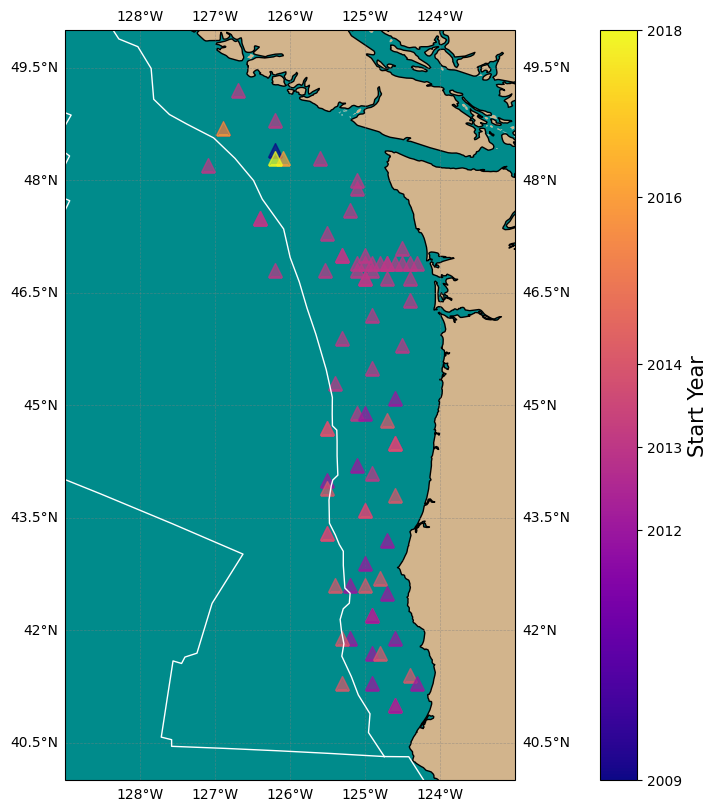

In [28]:
# initalize map
fig = plt.figure(figsize=[8,8],constrained_layout=True)
ax=fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent([-129, -123, 40, 50], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

ax.add_feature(cfeature.LAND, facecolor='tan') 
ax.add_feature(cfeature.OCEAN, facecolor='darkcyan')
ax.coastlines()


### TREMOR VALUES ###
'''
# get tremor values
tremor_values = [s["tremors"] for s in stations]
norm_t = colors.Normalize(vmin=min(tremor_values), vmax=max(tremor_values))
cmap_t = plt.colormaps['viridis']


# colorbaaa based on tremor values
sm = ScalarMappable(norm=norm_t, cmap=cmap_t)
sm.set_array([]) # dummy array
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Tremor Count')

# loop through stations
for station in stations:
    color = cmap_t(norm_t(station["tremors"]))
    ax.plot(station["lon"], station["lat"], marker='^', color= color, markersize=10, transform=ccrs.PlateCarree())
    ax.text(station["lon"] + 0.05, station["lat"] + 0.05, station["id"], fontsize=10, transform=ccrs.PlateCarree())
'''
### START YEAR
# get start years
start_year = [s["start_year"] for s in stations]
norm_s = colors.Normalize(vmin=min(start_year), vmax=max(start_year))
cmap_s = plt.colormaps['plasma']

# colorbaaa based on years
sm = ScalarMappable(norm=norm_s, cmap=cmap_s)
sm.set_array([]) # dummy array
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.ax.set_ylabel('Start Year', fontsize=15)

# just one tick for each year
years = sorted(set(start_year)) 
cbar.set_ticks(years)

texts = []

# loop through stations
for station in stations:
    color = cmap_s(norm_s(station["start_year"]))
    ax.plot(station["lon"], station["lat"], marker='^', color= color, markersize=10, alpha = 0.7, transform=ccrs.PlateCarree())
    #ax.text(station["lon"] + 0.05, station["lat"] + 0.05, station["id"], fontsize=10, transform=ccrs.PlateCarree())
    #texts.append(ax.text(station["lon"], station["lat"], station["id"], fontsize=8, transform=ccrs.PlateCarree()))

adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle='-', color='black'))
# Plot Tectonic Plate Boundaries
for feature in plate_boundaries['features']:
    coords = feature['geometry']['coordinates']
    if feature['geometry']['type'] == 'LineString':
        lons, lats = zip(*coords)
        ax.plot(lons, lats, color='white', linewidth=1, transform=ccrs.PlateCarree())
    elif feature['geometry']['type'] == 'MultiLineString':
        for line in coords:
            lons, lats = zip(*line)
            ax.plot(lons, lats, color='white', linewidth=1, transform=ccrs.PlateCarree())